# AEC 500/BAE 599 Lab 6
# Working with Geometric Data

## Outline
1. Setup Anaconda & Install libraries
2. Create Geometric Objects
3. Perform calucations using geometric objects
4. Importing field shapes from Mapping Program
5. Performing calculations on actual fields

### Part 1: Setup Anaconda & Install libraries
Anaconda should be installed from prior work, but it may need to be updated. You will need to install two python libraries (shapely & pyproj). You can do this with the Environment page in Anaconda, but you made need to make sure you are using at least Python 3.8. If not create a new Environment and install your applications and libraries into it.

This tutorial will be based on these versions of the libraries:
- Python 3.8
- Shapely 1.7.1
- PyProj 2.6.1

### Check your Installation
The following code was what I used to generate the images for lecture. Run it to make sure the libraries are installed correctly. You should see something similar to what was in the lecture. *Hint: This is also useful example code for getting started with this lab!*


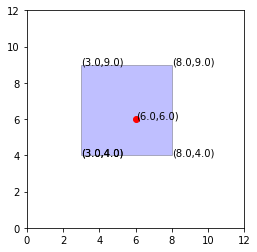

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shp

# Define the points that make up the square.
x1 = 3
y1 = 4
width = 5
boundary = np.array([[  x1, x1+width, x1+width,       x1, x1 ],
                     [ y1,        y1, y1+width, y1+width, y1]])

# Create the square
square = shp.Polygon(boundary.T)

# Create the figure and plot the squre
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_aspect('equal') # Make the plot sqare
ax.set_xlim(0,12) # Set x-axis limits
ax.set_ylim(0,12) # Set y-axis limits
xn, yn = np.array(square.exterior.xy)
# Fill is a command to plot polygons in Matplotlib.
# We set the face color (fc) to blue ('b') and the edge color to black('k').
# It is 25% transparent with alpha = 0.25
ax.fill(xn, yn, alpha=0.25, fc='b',  ec='k')
# Plot the point as a dot (format = 'o') and in red (format = 'r'), or together as 'ro'
point = shp.Point(6, 6)
ax.plot(point.x,point.y,'ro')
# Add annotation text for the point. You probably don't need this in lab.
ax.text(point.x,point.y,f"({point.x},{point.y})")
# Add annotation text for the points. The points are in columns in the array 
# produced by calling square.exterior.xy. You can only iterate over rows in 
# an numpy array, so it is transposed with the .T, which gives me the columns
# as rows. I then pull the x (position 0) and y (position 1) out of the column
# and use it in the plot command. You probably don't need this in lab, but I'm
# describing what in the world I'm doing in case you are curious. 
for col in np.array(square.exterior.xy).T:
    ax.text(col[0],col[1],f"({col[0]},{col[1]})")

### Part 2: Create Geometric Objects
Let's start simple! First, let's create a point at (3,4).

Plot this point

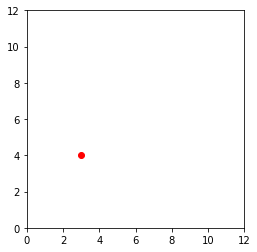

In [18]:
# Insert code here.
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_aspect('equal') # Make the plot sqare
ax.set_xlim(0,12) # Set x-axis limits
ax.set_ylim(0,12) # Set y-axis limits
point_1 = shp.Point(3,4)
ax.plot(point_1.x, point_1.y,'ro')

Let's make this a bit more complicated and plot multiple points.

Create the following points:
(5,1)
(5,5)
(1,1)
(1,5)

Plot these points. Make sure to set your axis limits so that these points are clearly visible and not too large or small.

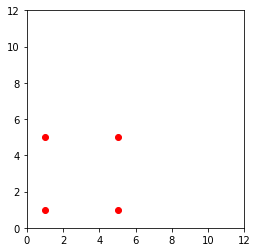

In [20]:
# Insert code here.

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
list_points = [shp.Point(5,1),
shp.Point(5,5),
shp.Point(1,1),
shp.Point(1,5)
] # created a list of the points to plot.
xs = [point.x for point in list_points] # x coordinate of the points to plot
ys = [point.y for point in list_points] # y coordinate of the points to plot 

ax.plot(xs,ys,'ro')  

Now we will move onto polygons. 

Create a polygon with the following points as its boundary
(6,2)
(4,3)
(5,5)
(3,7)
(1,4)
(2,2)
(3,0)
(3,2)
(4,2)
(4,0)
(6,2)

Plot this polygon.

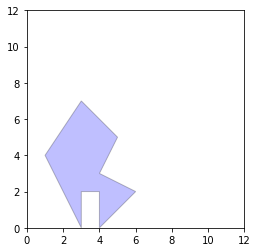

In [38]:
# Insert code here

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
polygon = shp.Polygon([(6,2),(4,3),(5,5),(3,7),(1,4),(2,2),(3,0),(3,2),(4,2),(4,0),(6,2)]) # create the polygon with it boundaries
polygon # output the polygon
xp, yp = np.array(polygon.exterior.xy)
ax.fill(xp, yp, alpha=0.25, fc='b',  ec='k')







### Part 3: Perform calucations using geometric objects

What is the area of this polygon you just created in the step above?

What is the perimeter of this polygon?

Write code below to handle this calculation and print the result in the output.

In [39]:
# Insert code here.

area_polygon = polygon.area # calculate area
area_polygon
perimeter_polygon = polygon.length # calculate the perimeter of the polygon
print(perimeter_polygon)
print(area_polygon)

23.20667743495553
16.0


Test each of the points you created above to see if they are inside, outside or on the boundary of the polygon you just created. You should have 5 points at: 
- (3,4)
- (5,1)
- (5,5)
- (1,1)
- (1,5)

Write code to make this determination and plot the result for each point in the output. 

Use the format "Point (x,y): boundary/inside/outside" with a separate line for each point.

Example output if you were testing (6,2), (10,10):  

Point (6,2): boundary  
Point (10,10): outside  

Make sure to format your output correctly!

In [48]:
# Insert code here.
point1 = shp.Point(3,4)
point2 = shp.Point(5,1)
point3 = shp.Point(5,5)
point4 = shp.Point(1,1)
point5 = shp.Point(1,5)

list_points_test = [point1,point2,point3,point4,point5]

for point in list_points_test:
    if (point.within(polygon)):
        print(point, ": inside")
    elif (point.intersects(polygon)):
        print(point, ": boundary")
    else:
        print(point, ": outside")



POINT (3 4) : inside
POINT (5 1) : boundary
POINT (5 5) : boundary
POINT (1 1) : outside
POINT (1 5) : outside


Plot these points and the polygon on the figure so that you can check your answer.

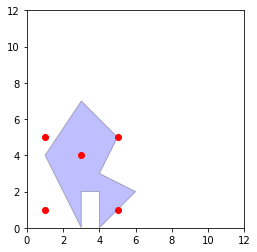

In [50]:
# Insert code here.

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.fill(xp, yp, alpha=0.25, fc='b',  ec='k')
xtest = [point.x for point in list_points_test] # x coordinate of the points to plot
ytest = [point.y for point in list_points_test] # y coordinate of the points to plot 

ax.plot(xtest,ytest,'ro')  # plot point


### Part 4: Importing field shapes from Mapping Program
Use a mapping program like Google Maps that lets use view satelite imagery that can provide the latitude and longitude for arbitary points on that imagery. Find a **non-convex** field within about 100 miles of your university. ([Go here if you need help remembering what non-convex is](./res/tdt_G_convexpolygons.pdf))

Using the program, determine the latitude and longitude of the points that make up the boundary of the field. Capture a screenshot of your field (similar to mine below) and put it into your lab6 folder to show the field you are using. Make sure that the latitude and longitude of at least one point are captured in the screenshot.

![Example of a point on a non-convex field in Google Maps](../img/GoogleMapsForaPoint.png)

Create points in this notebook for each point that makes up the boundary using the latitude and longitude.

In [1]:
# Insert code here.
print("test git work")

test git work


Use Shapely and Pyproj to convert those Latitude and Longitude Points into Cartisian points. For each point, print its (lat, long) and (X,Y) values.

[See the Shapely documentation for examples on how to do this.](https://shapely.readthedocs.io/en/latest/manual.html#other-transformations) 

The Shapely example is not for our location. It does use the correct projection for the GPS/lat/long points, but you will need a different projection for the location of your field. Remember (from lecture):
- WGS84 (GPS or Lat/Long Coordinates): EPSG:4326
- UTM Zone: 16n Indiana, Central and Eastern Kentucky: EPSG:32616


In [11]:
# Insert code here.

Plot the field boundary using Cartisian points. 

*UTM projections will usually end up with very large values for the coordinates as the origin will almost always be many km from the current location. The values provided by UTM are the number of meters from the origin. You many need to use scientific notation or otherwise adjust the scale of your plot to the field plotted correctly. You will also need to consider the x and y axis limits.*

In [ ]:
# Insert code here.

### Part 5: Performing calculations on actual fields

What is the area of the field in m<sup>2</sup>?

Calculate and print the result.

In [12]:
# Insert code here.

How long would a fence have to be to surround the field on its boundary? (i.e. What is its perimeter?). Provide your answer in meters.

In [13]:
# Insert code here.

You are planning on planting a very high value but very sensitive crop in this field. You will require a 20 meter buffer between this crop and other crops. If you place this buffer inside the field boundaries, create the resulting polygon. Plot this new smaller field with the original field. 

To plot both polygons and have them be visible, you can plot the original field first and then the new smaller field. Make sure to use different colors.

A more elegant approach would be to make the polygons partially transparent. You can do that by adding an "alpha = 0.5" term to the ax.fill command that you use to plot the polygon. The following code snippet would plot your square in red as 25% transparent with a black boundary. Go to Matplotlib help if you need to find other colors or formats.
```
ax.fill(xn, yn, alpha=0.25, fc='r', ec='k')
```

In [17]:
# Insert code here.

What is the percent difference in area between the original field and this buffered field? 

You can calculate percent difference as
```
percent difference = (original_area - new_area)/original_area
```
Calculate the result and print it.

In [18]:
# Insert code here.

Of course, if a field happens to be surrounded by hay meadow, pasture or forests, it may be able to have the buffer area extend beyond the field instead.

Let's calculate the buffer if it extends beyond the field boundary rather than on the inside. Create a new polygon with an outside buffer.

Plot this polygon with the orginal polygon.

In [19]:
# Insert code here.

What is the area of this expanded buffer region? How much area are you going to effect with the buffer outside the field? 

*Note: This answer should be in m<sup>2</sup>. It is not a percent difference. It is the difference between the two polygons.*

*If the buffer is inside the field you are probably worried about how much of the field you are giving up in percentage terms. If it is outside the field, you are probably more interested in the raw area that you are going to monitor.*

In [20]:
# Insert code here.

We are now going to return to the original field.

You have decided to split this field in order to plant two different crops or varieties. You need to select a line that will let you divide the field approximately in half. Select two boundary points on the field polygon and use them. *This does not need to be precisely dividing the field in half. Just do more than cutting off one little corner.*

- Create a line using the selected boundary points.
- Use this line to split the polygon into subfields.

*Depending on the line and the shape of the field, this could be two or more sub fields, so check the output.*

What are the areas (used to calculate inputs) and perimeters (used to determine boundary fencing) for each sub-field.
Print your results using the following format

Sub-field 1: Area: XYZ m2, Perimeter: XYZ m
Sub-field 2: Area: XYZ m2, Perimeter: XYZ m
*more as necessary*

In [21]:
# Insert code here.

Plot the subfields and dividing line using different colors.

In [22]:
# Insert code here.

Create a new line by rotate the dividing line 90 degrees around its center. 

*Hint: [You can use an affine rotation transformation.](https://shapely.readthedocs.io/en/latest/manual.html#shapely.affinity.rotate)*

Use this new rotated line to split the original field.

- As before, use this rotated line to calculate the perimeters and areas of the sub-field and print them. 
- Plot the subfields and dividing line using different colors.

It is possible that this rotated dividing line does not intersect your original field. If extending the line allows it to divide the field, you must do that and note that you did so in comments in your code. If the rotated line will not intersect the original field, even if extended, you must note that in your comments as well. You will not have subfields so it will not be possible to cacluate areas or perimeters, and you should skip that part. In either case, plotting the rotated dividing line and the field/sub-fields should make the case obvious.

*Note: There is no simple command to extend a line in shapely. You will need to print the xy coordinates and use regular math to determine the slope of the line. Any arbitrary points beyond the boundaries of the orginal field on opposite sides should be suitable and you can calculate that with basic trigonometry. 

In [ ]:
# Insert code here.